# Problem Statement
>#### credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### ML task
>##### Binary classification Problem

### Evaluation craiteria
>#####  measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC)

### Importing Neccessary libraries

In [1]:
#pip install --upgrade numpy pandas

In [2]:
#pip install tensorflow

In [3]:
#pip install --upgrade pip

In [4]:
#pip install keras-tuner

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install  scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import precision_recall_curve, auc, precision_score, accuracy_score 
import matplotlib.pyplot as plt
import joblib

### load data and first look

In [9]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.shape

(284807, 31)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
df.duplicated().any()

True

In [13]:
df = df.drop_duplicates()

In [14]:
df.shape

(283726, 31)

In [15]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
df.corr()["Class"].drop("Class")

Time     -0.012359
V1       -0.094486
V2        0.084624
V3       -0.182322
V4        0.129326
V5       -0.087812
V6       -0.043915
V7       -0.172347
V8        0.033068
V9       -0.094021
V10      -0.206971
V11       0.149067
V12      -0.250711
V13      -0.003897
V14      -0.293375
V15      -0.003300
V16      -0.187186
V17      -0.313498
V18      -0.105340
V19       0.033631
V20       0.021486
V21       0.026357
V22       0.004887
V23      -0.006333
V24      -0.007210
V25       0.003202
V26       0.004265
V27       0.021892
V28       0.009682
Amount    0.005777
Name: Class, dtype: float64

In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
X = df.drop(columns = ["Class"])
y = df["Class"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [20]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [21]:
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid") 
])

C:\Users\KISHORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy", tf.keras.metrics.AUC(curve="PR", name="auprc")])

In [23]:
history = model.fit(X_train_resampled, y_train_resampled,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/20
12747/12747 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - accuracy: 0.8115 - auprc: 0.7550 - loss: 17.9101 - val_accuracy: 0.9999 - val_auprc: 1.0000 - val_loss: 1.9795e-04
Epoch 2/20
12747/12747 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9255 - auprc: 0.9108 - loss: 2.6735 - val_accuracy: 0.7484 - val_auprc: 1.0000 - val_loss: 8.4121
Epoch 3/20
12747/12747 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - accuracy: 0.9442 - auprc: 0.9683 - loss: 0.3033 - val_accuracy: 0.9213 - val_auprc: 1.0000 - val_loss: 0.1652
Epoch 4/20
12747/12747 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - accuracy: 0.9487 - auprc: 0.9778 - loss: 0.1624 - val_accuracy: 0.9252 - val_auprc: 1.0000 - val_loss: 0.1710
Epoch 5/20
12747/12747 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9602 - auprc: 0.9857 - loss: 0.1249 - val_accuracy: 0.9347 - val_auprc: 1.0000 - val_loss: 0.1447
Epoch 6/20
12747/12747 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9624 - auprc: 0.9876 - loss: 0.1169 - val_accuracy: 0.9409 - val_auprc: 1.0000 

In [24]:
test_loss, test_acc, test_auprc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test AUPRC   : {test_auprc:.4f}")

Test Accuracy: 0.9948
Test AUPRC   : 0.6306


1774/1774 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


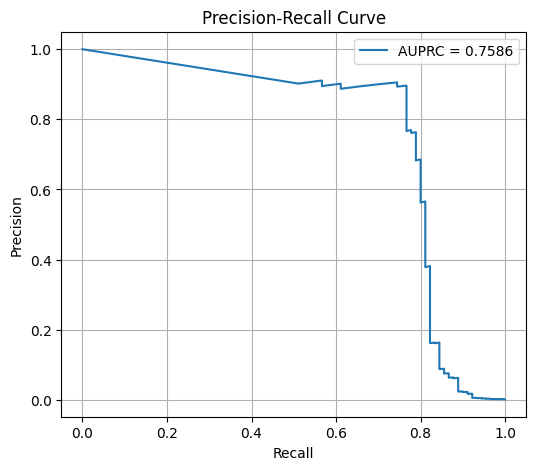

In [25]:
y_scores = model.predict(X_test).ravel()

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"AUPRC = {pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

### Fine tuning FNN usin keras_tuner RandomSearch

In [26]:
df = pd.read_csv('creditcard.csv')
X = df.drop('Class', axis=1)
y = df['Class']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [28]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [30]:
X_test_scaled.shape

(42722, 30)

In [31]:
def build_model(input_shape, num_classes=1, hidden_units=[64, 32], activation='relu', output_activation='sigmoid'):
    model = Sequential()
    model.add(Dense(hidden_units[0], input_shape=(input_shape,), activation=activation))
    for units in hidden_units[1:]:
        model.add(Dense(units, activation=activation))
    
    if num_classes == 1: 
        model.add(Dense(1, activation=output_activation))
    else: 
        model.add(Dense(num_classes, activation=output_activation)) 

    return model

input_dim = X_train_scaled.shape[1]
model = build_model(input_shape=input_dim, num_classes=1, hidden_units=[128, 64], activation='relu', output_activation='sigmoid')

model.summary()

C:\Users\KISHORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.AUC(curve="PR", name="auprc")])

In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=10,             
    batch_size=32,          
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping]
)

Epoch 1/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9992 - auprc: 0.6984 - loss: 0.0056 - val_accuracy: 0.9992 - val_auprc: 0.7885 - val_loss: 0.0033
Epoch 2/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9994 - auprc: 0.8088 - loss: 0.0032 - val_accuracy: 0.9994 - val_auprc: 0.8491 - val_loss: 0.0028
Epoch 3/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9994 - auprc: 0.8395 - loss: 0.0028 - val_accuracy: 0.9993 - val_auprc: 0.8102 - val_loss: 0.0037
Epoch 4/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9994 - auprc: 0.8424 - loss: 0.0027 - val_accuracy: 0.9994 - val_auprc: 0.8408 - val_loss: 0.0030
Epoch 5/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9994 - auprc: 0.8656 - loss: 0.0024 - val_accuracy: 0.9993 - val_auprc: 0.8324 - val_loss: 0.0031
Epoch 6/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9995 - auprc: 0.8705 - loss: 0.0023 - val_accuracy: 0.9994 - val_auprc: 0.8439 - val_loss: 0.002

In [34]:
def model_builder_kt(hp):
    hp_units_l1 = hp.Int('units_l1', min_value=32, max_value=256, step=32)
    hp_units_l2 = hp.Int('units_l2', min_value=16, max_value=128, step=16)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])
    hp_dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)

    model = Sequential()
    model.add(Dense(hp_units_l1, input_shape=(input_dim,), activation='relu'))
    model.add(Dropout(hp_dropout_rate))
    model.add(Dense(hp_units_l2, activation='relu'))
    model.add(Dropout(hp_dropout_rate))
    
 
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy',tf.keras.metrics.AUC(curve="PR", name="auprc")]
    )
    return model

tuner = kt.RandomSearch(
    model_builder_kt,
    objective=kt.Objective("val_auprc", direction="max"),
    max_trials=2,
    executions_per_trial=2,
    directory='my_dir',
    project_name='auprc_tuning'
)

tuner.search_space_summary()

tuner.search(
    X_train_scaled,
    y_train,
    epochs=10,
    validation_data=(X_val_scaled, y_val)
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of units in the first densely-connected layer is {best_hps.get('units_l1')}.
The optimal number of units in the second densely-connected layer is {best_hps.get('units_l2')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
The optimal dropout rate is {best_hps.get('dropout_rate')}.
""")

best_model = tuner.hypermodel.build(best_hps)
print("--------------------------------------------------")
print("Best Model Summary:")
best_model.summary()

Reloading Tuner from my_dir\auprc_tuning\tuner0.json
Search space summary
Default search space size: 4
units_l1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_l2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 1e-05], 'ordered': True}
dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}

The optimal number of units in the first densely-connected layer is 192.
The optimal number of units in the second densely-connected layer is 128.
The optimal learning rate for the optimizer is 0.001.
The optimal dropout rate is 0.30000000000000004.

--------------------------------------------------
Best Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 192)                 │           5,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,785 (120.25 KB)

 Trainable params: 30,785 (120.25 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = best_model.fit(
    X_train_scaled,
    y_train,
    epochs=10,
    validation_data=(X_val_scaled, y_val),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auprc', patience=10, mode='max')]
)

print("\n--- AUPRC tuning is complete.---")

Epoch 1/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.9991 - auprc: 0.6077 - loss: 0.0067 - val_accuracy: 0.9993 - val_auprc: 0.7306 - val_loss: 0.0038
Epoch 2/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9993 - auprc: 0.7315 - loss: 0.0041 - val_accuracy: 0.9993 - val_auprc: 0.8088 - val_loss: 0.0032
Epoch 3/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.9994 - auprc: 0.7744 - loss: 0.0039 - val_accuracy: 0.9993 - val_auprc: 0.8054 - val_loss: 0.0034
Epoch 4/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.9993 - auprc: 0.8003 - loss: 0.0035 - val_accuracy: 0.9993 - val_auprc: 0.8133 - val_loss: 0.0038
Epoch 5/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9994 - auprc: 0.7983 - loss: 0.0034 - val_accuracy: 0.9993 - val_auprc: 0.7734 - val_loss: 0.0044
Epoch 6/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.9994 - auprc: 0.8049 - loss: 0.0035 - val_accuracy: 0.9993 - val_auprc: 0.8093 - val_loss: 0.003


--- Evaluating the model on the test set ---
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Test AUPRC: 0.8801

--- Calculating Precision and Accuracy at a Threshold ---
Test Precision at threshold 0.5: 0.8545
Test Accuracy at threshold 0.5: 0.9995
Calculation complete!

--- Plotting the Precision-Recall Curve ---


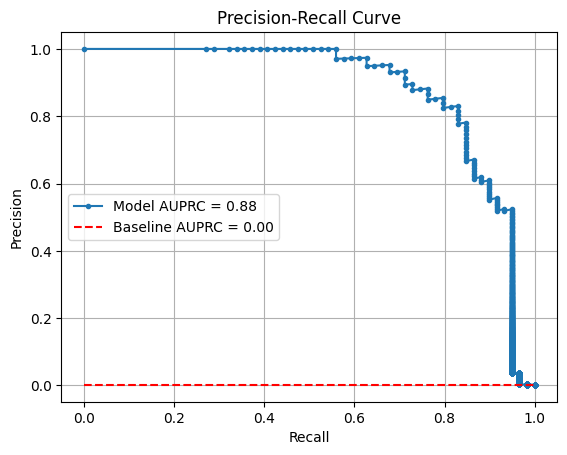

In [36]:
print("\n--- Evaluating the model on the test set ---")
y_scores = best_model.predict(X_test_scaled).ravel()

precision_values, recall_values, thresholds = precision_recall_curve(y_test, y_scores)
auprc_score = auc(recall_values, precision_values)

print(f"Test AUPRC: {auprc_score:.4f}")

print("\n--- Calculating Precision and Accuracy at a Threshold ---")
# Set a classification threshold (e.g., 0.5)
threshold = 0.5

y_pred_binary = (y_scores > threshold).astype(int)

precision = precision_score(y_test, y_pred_binary)
print(f"Test Precision at threshold {threshold}: {precision:.4f}")

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Test Accuracy at threshold {threshold}: {accuracy:.4f}")
print("Calculation complete!")

print("\n--- Plotting the Precision-Recall Curve ---")
plt.figure()
plt.plot(recall_values, precision_values, marker='.', label=f'Model AUPRC = {auprc_score:.2f}')

baseline_auprc = np.sum(y_test) / len(y_test)
plt.plot([0, 1], [baseline_auprc, baseline_auprc], linestyle='--', label=f'Baseline AUPRC = {baseline_auprc:.2f}', color='red')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
new_data = np.array([51155,-11.20546139,7.914633492,-13.98775164,4.33334118,-8.484969523,-3.506561173,-8.935243032,7.704449151,-2.33658418,-5.927359169,2.470401016,-5.788517031,-0.391939257,-6.527462241,0.899859362,-3.847292842,-6.700637448,-2.492616107,0.469554314,0.860911742,0.942593331,-0.987848115,-0.279446305,-0.027299225,0.644344196,-0.263077923,1.084022528,0.211933357,99.99

]).reshape(1, -1)

In [44]:
new_data.shape

(1, 30)

In [45]:
new_data_scaled = scaler.transform(new_data)

C:\Users\KISHORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
new_scores = best_model.predict(new_data_scaled).ravel()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [47]:
# Apply the threshold to get the final predictions
new_predictions = (new_scores > 0.5).astype(int)

print(f"New data points:\n{new_data}")
print(f"\nPredicted probabilities: {new_scores}")
print(f"Final predictions (using a 0.5 threshold): {new_predictions}")
print("Prediction on new data complete!")

New data points:
[[ 5.11550000e+04 -1.12054614e+01  7.91463349e+00 -1.39877516e+01
   4.33334118e+00 -8.48496952e+00 -3.50656117e+00 -8.93524303e+00
   7.70444915e+00 -2.33658418e+00 -5.92735917e+00  2.47040102e+00
  -5.78851703e+00 -3.91939257e-01 -6.52746224e+00  8.99859362e-01
  -3.84729284e+00 -6.70063745e+00 -2.49261611e+00  4.69554314e-01
   8.60911742e-01  9.42593331e-01 -9.87848115e-01 -2.79446305e-01
  -2.72992250e-02  6.44344196e-01 -2.63077923e-01  1.08402253e+00
   2.11933357e-01  9.99900000e+01]]

Predicted probabilities: [0.72841]
Final predictions (using a 0.5 threshold): [1]
Prediction on new data complete!


In [48]:
'''best_model.save('best_model.h5')
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler have been saved to 'best_model.h5' and 'scaler.pkl'.")'''

Model and scaler have been saved to 'best_model.h5' and 'scaler.pkl'.
